<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [132]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [134]:
df=pd.read_csv("C:/Users/igara/Ironhack Bootcamp/Bootcamp ironhack week5/lab-unsupervised-learning-en/data/Wholesale customers data.csv")

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [136]:
df.sample(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
411,1,3,2126,3289,3281,1535,235,4365
218,2,1,18,7504,15205,1285,4797,6372
144,1,3,18827,3677,1988,118,516,201



FRESH: Spending on fresh products.

MILK: Spending on milk-based products.

GROCERY: Spending on general grocery products.

FROZEN: Spending on frozen foods.

DETERGENTS_PAPER: Spending on detergents and paper products.

DELICATESSEN: Spending on specialty food items ready-to-eat  products (such as cooked meats and prepared salads,etc)

ALL SPENDINGS ARE ANNUAL SPENDING

Customers are divided into three regions:
Lisbon: 77 customers
Oporto: 47 customers
Other Regions: 316 customers

Customers are categorized into two sales channels:
Horeca (Hotels/Restaurants/Cafés): 298 customers
Retail: 142 customers


In [138]:
df["Region"].value_counts() 
# here we can observe that 1 is lisbon 2 is oporto and 3 is other regions

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [139]:
df["Lisbon"]=(df["Region"] == 1).astype(int)
df["Oporto"]=(df["Region"]== 2).astype(int)
df["Other"]=(df["Region"]==3).astype(int)

In [140]:
df["Channel"].value_counts() 
# here we can observe that 1 is horeca and 2 is retail

Channel
1    298
2    142
Name: count, dtype: int64

In [141]:
df["Horeca"]=(df["Channel"] == 1).astype(int)
df["Retail"]=(df["Channel"]== 2).astype(int)

Machine Learning models do not work with categorical data and to fit this data into the machine learning model it needs to be converted into numerical data. For example, suppose a dataset has a Gender column with categorical elements like Male and  Female. These labels have no specific order of preference and also since the data is string labels, machine learning models misinterpreted that there is some sort of hierarchy in them.

To address this issue, one effective technique is one hot encoding. OHE in machine learning transforms categorical data into a numerical format that machine learning algorithms can process without imposing any ordinal relationships.

link:(https://www.geeksforgeeks.org/ml-one-hot-encoding/)

In [143]:
df=df.drop(columns=["Channel","Region"])

In [144]:
df.isna().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Lisbon              0
Oporto              0
Other               0
Horeca              0
Retail              0
dtype: int64

In [145]:
num_corr=round(df.corr(), 2)

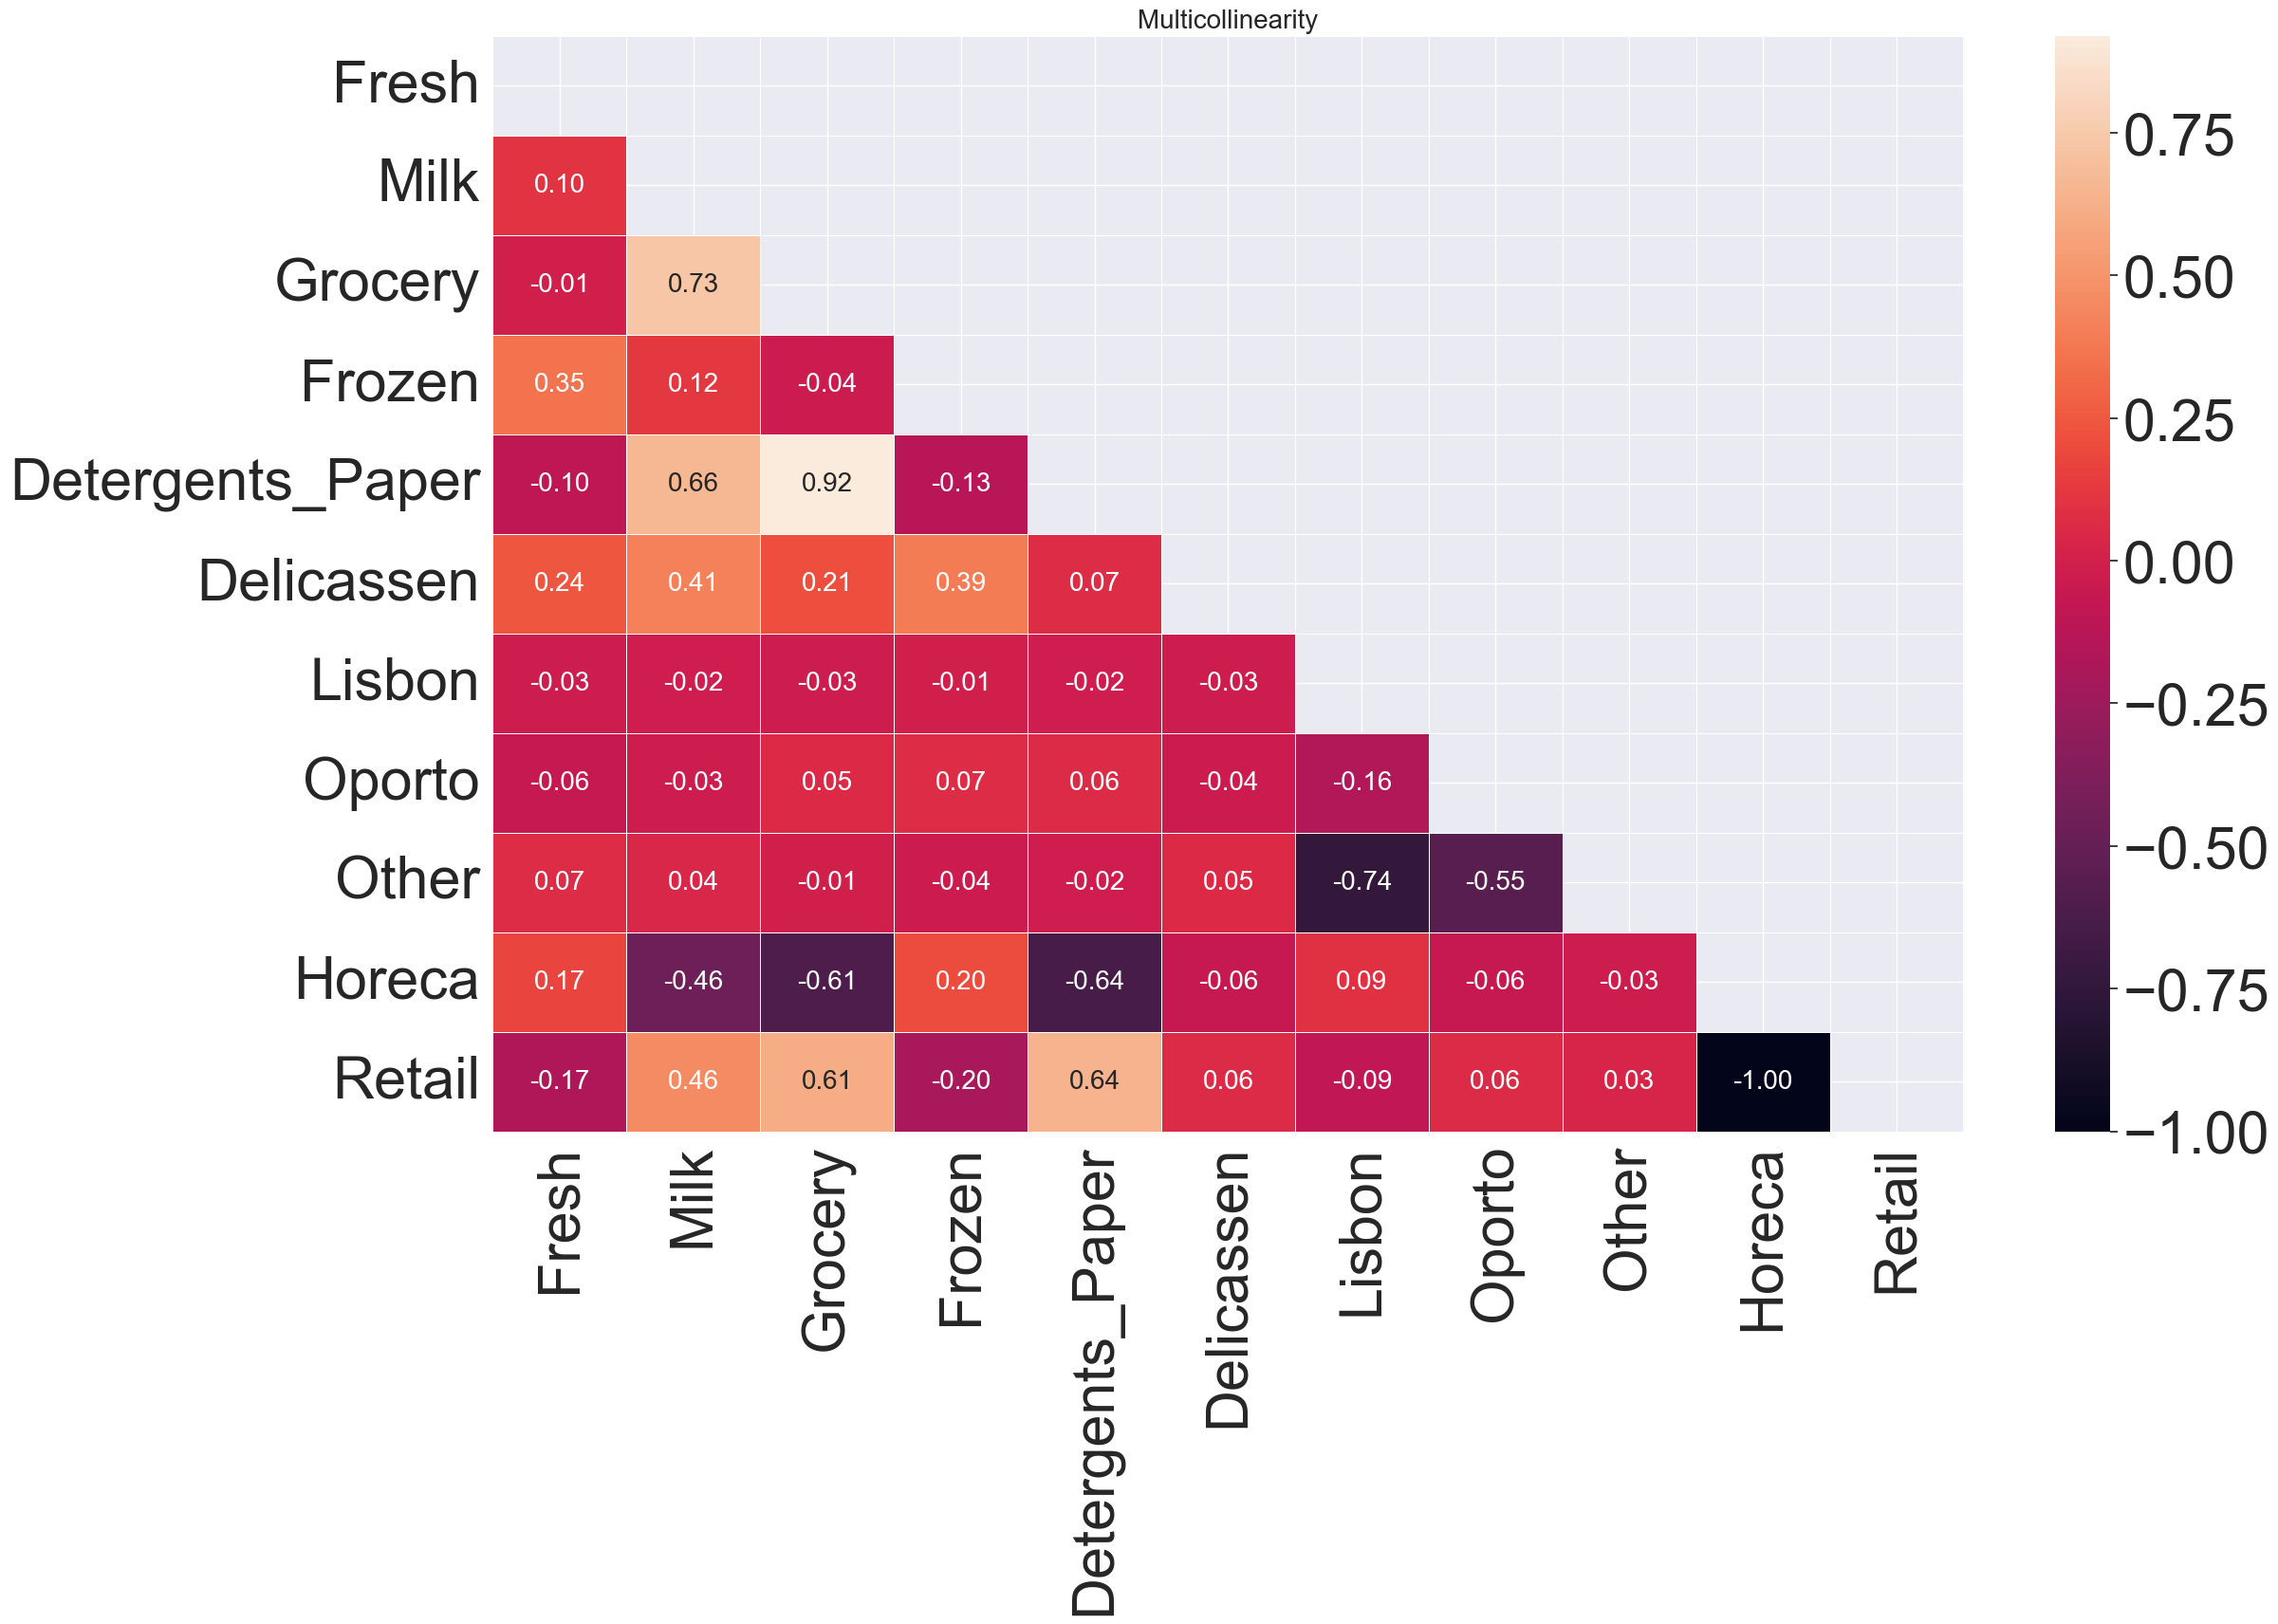

In [146]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=4) 

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 20}, linewidths=.5, cmap="rocket", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Multicollinearity", fontsize=20) 
plt.show()

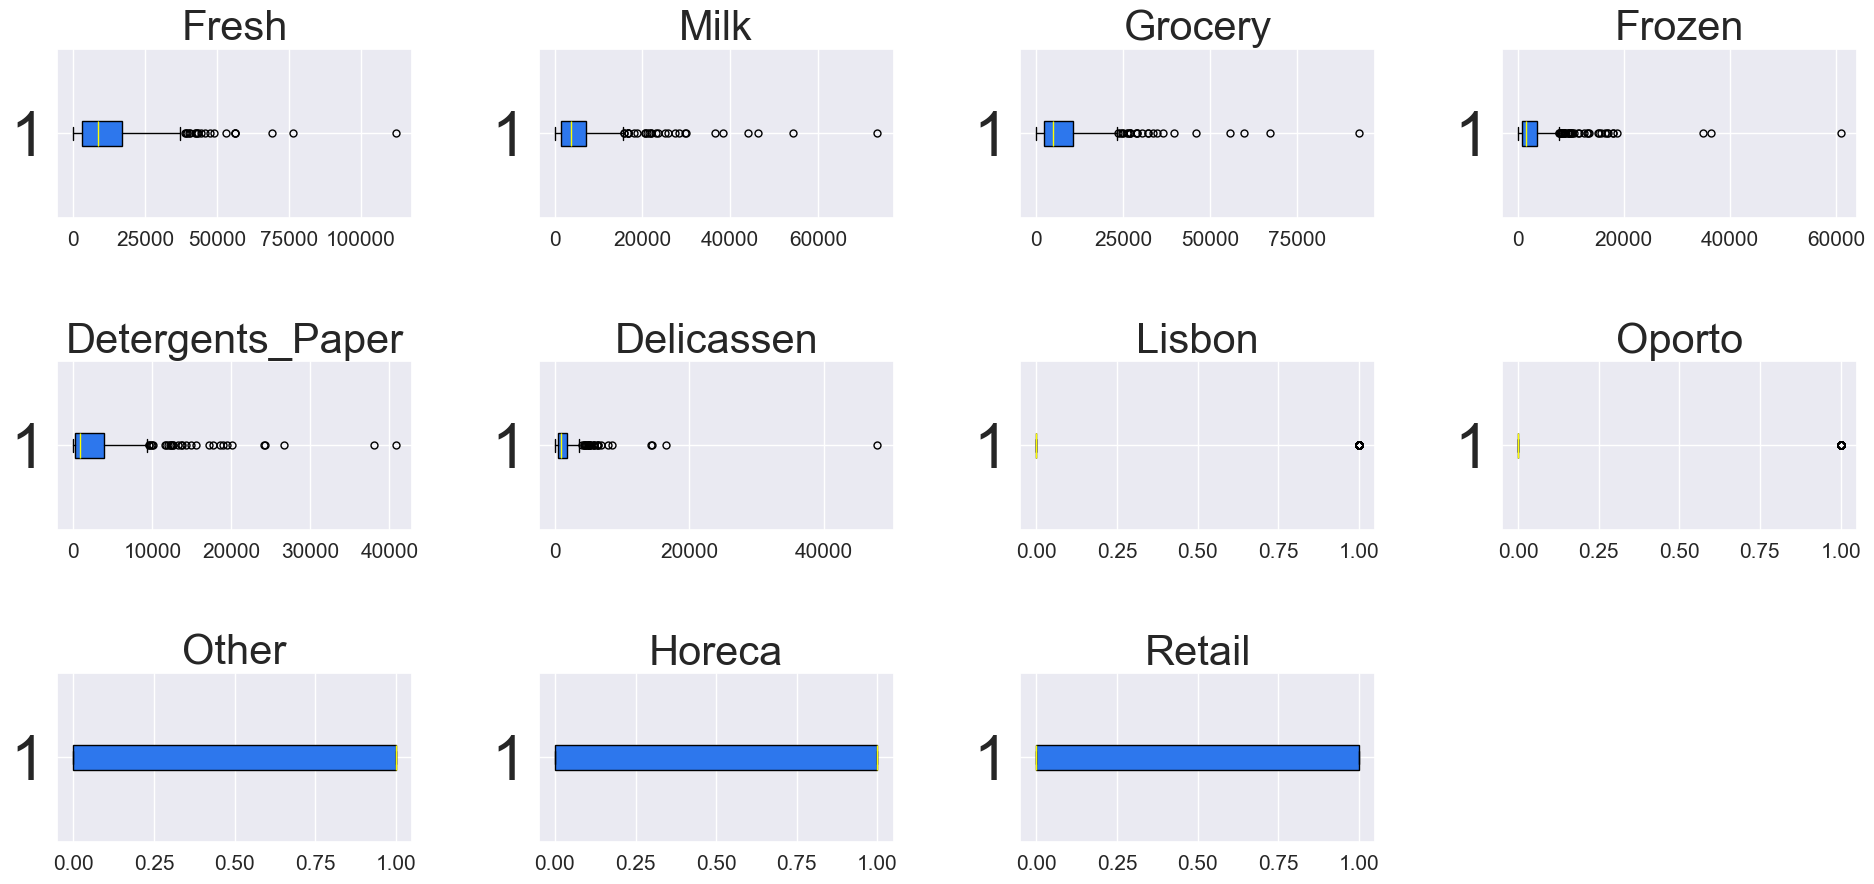

In [147]:
color = "#2d77ed"

nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=30)
    ax.tick_params(axis='x', labelsize=15)

plt.tight_layout()
plt.show()

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [150]:
clean_customers=df.copy()
# to_combine_columns=["Grocery","Detergents_Paper","Milk"]
# clean_customers["GMD"]=clean_customers[to_combine_columns].sum(axis=1)
# clean_customers=clean_customers.drop(columns=to_combine_columns)
# Grocery,milk and detergents and paper in my analisis could be convined all three into one category because they have really high 
# correlation between them and can lead to redundant information

**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
scaler=StandardScaler()
customer_scale=scaler.fit_transform(clean_customers)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [156]:
from sklearn.cluster import KMeans

In [157]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(customer_scale)

C:\Users\igara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [158]:
labels = kmeans.predict(customer_scale)
clusters = kmeans.labels_.tolist()
clean_customers["Label"] = clusters

In [159]:
clean_customers["Label"].value_counts()

Label
1    268
0    113
3     46
2     13
Name: count, dtype: int64

### Looking to the elbow we can choose 2 like the correct number of clusters

In [161]:
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(customer_scale)

C:\Users\igara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [162]:
labels = kmeans_2.predict(customer_scale)

clusters = kmeans_2.labels_.tolist()

In [163]:
clean_customers["Label"] = clusters

Count the values in `labels`.

In [165]:
clean_customers["Label"].value_counts()

Label
1    297
0    143
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [167]:
from sklearn.cluster import DBSCAN 
dbscan=DBSCAN(eps=0.5)
dbscan.fit(customer_scale)


DBSCAN()

In [168]:
clean_customers["DBSCAN_Label"]=dbscan.labels_

Count the values in `labels_DBSCAN`.

In [170]:
clean_customers["DBSCAN_Label"].value_counts()

DBSCAN_Label
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [244]:
# def plot(x,y,hue):
#     sns.scatterplot(x=x, 
#                     y=y,
#                     hue=hue)
#     plt.title('Detergents Paper vs Milk ')
#     return plt.show();

In [274]:
# GPT
def plot(x, y, hue):
    plt.figure(figsize=(8, 6))  # Adjust figure size for clarity
    sns.scatterplot(
        x=x,
        y=y,
        hue=hue,
        palette="tab10",  # Use a palette suitable for up to 10 distinct categories
        alpha=0.8,  # Adjust transparency for overlapping points
    )
    plt.title("...", fontsize=16)
    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    plt.legend(title="Cluster Label", fontsize=10, title_fontsize=12, loc='best')
    plt.grid(True, linestyle='--', alpha=0.6)  # Add a subtle grid
    return plt.show()

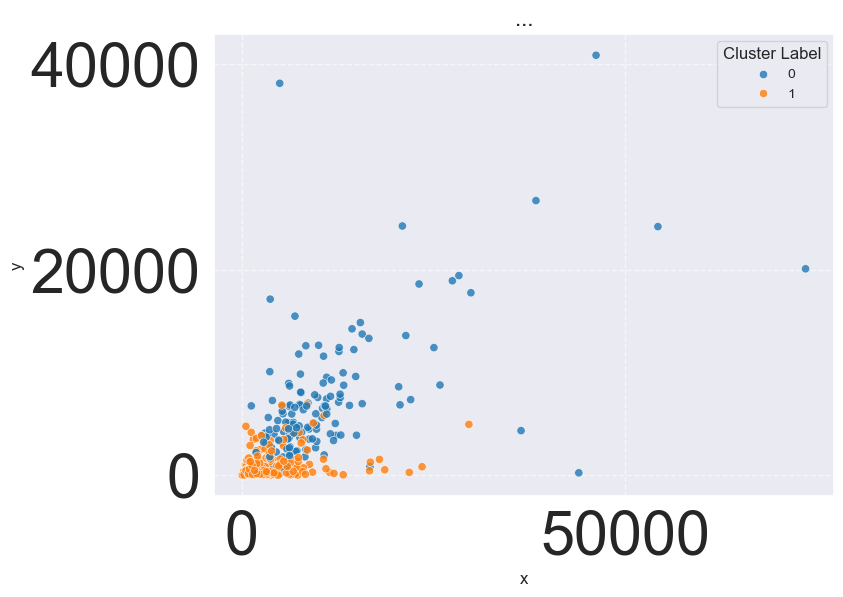

In [276]:
plot(clean_customers["Milk"],clean_customers["Detergents_Paper"],clean_customers["Label"])

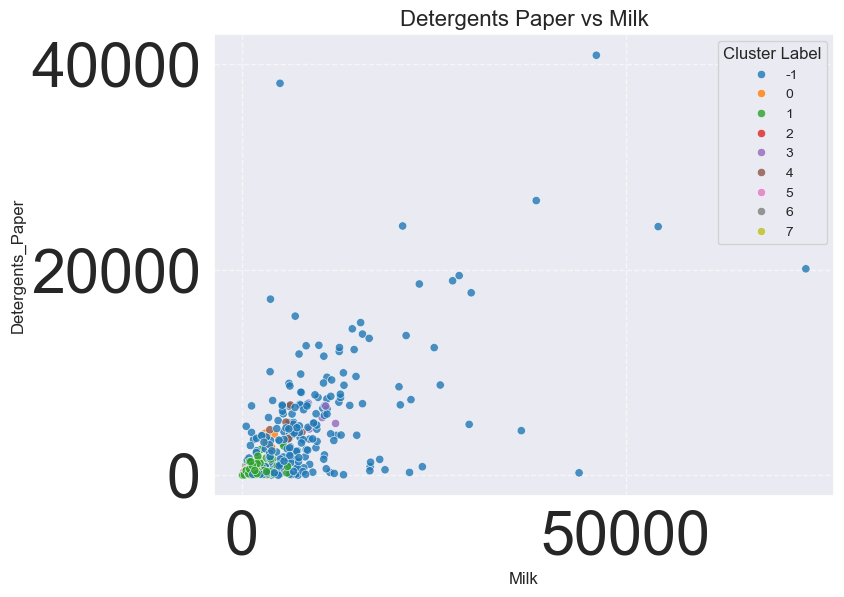

In [258]:
plot(clean_customers["Milk"],clean_customers["Detergents_Paper"],clean_customers["DBSCAN_Label"])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

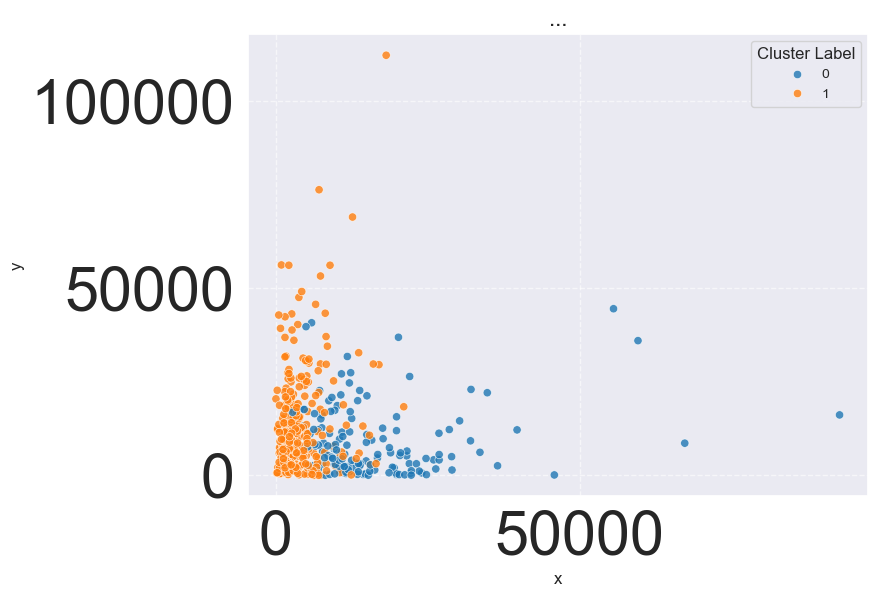

In [278]:
plot(clean_customers["Grocery"],clean_customers["Fresh"],clean_customers["Label"])

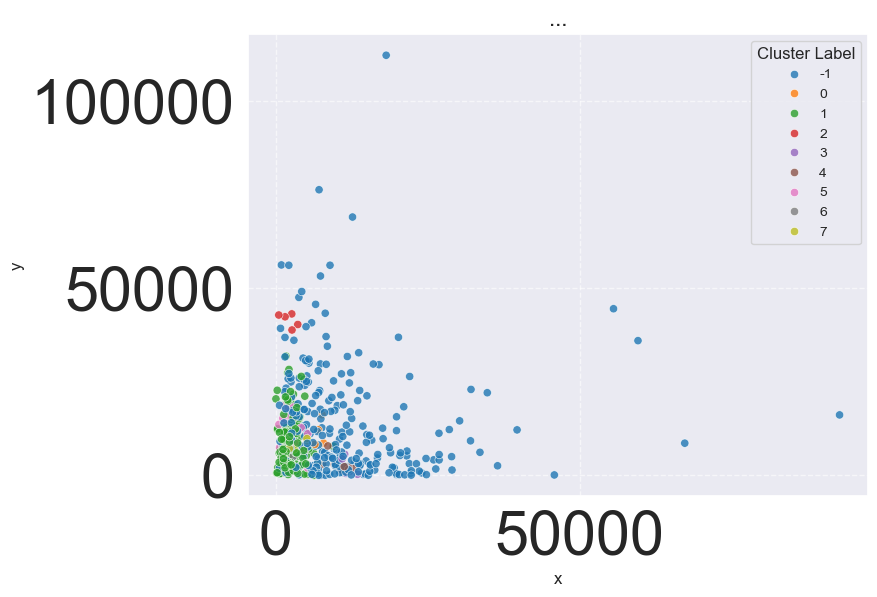

In [280]:
plot(clean_customers["Grocery"],clean_customers["Fresh"],clean_customers["DBSCAN_Label"])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

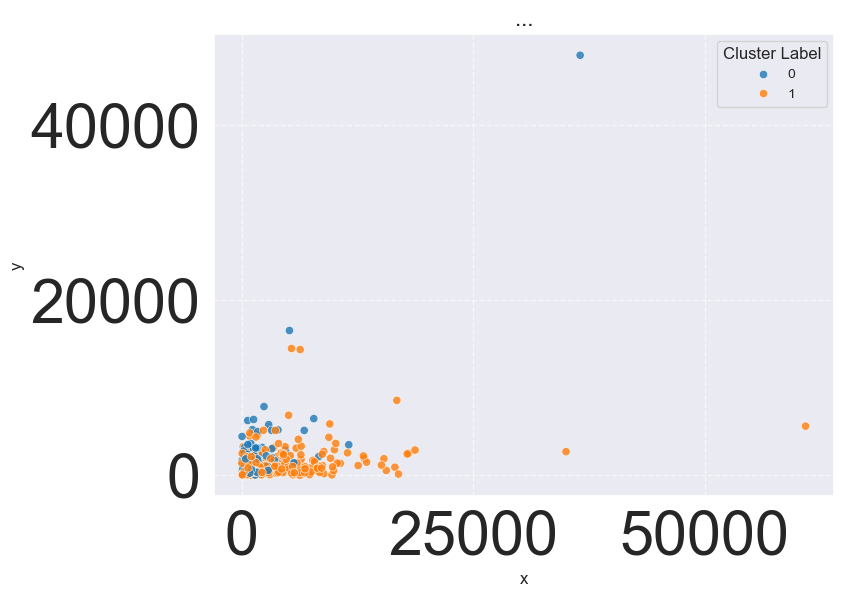

In [284]:
plot(clean_customers["Frozen"],clean_customers["Delicassen"],clean_customers["Label"])

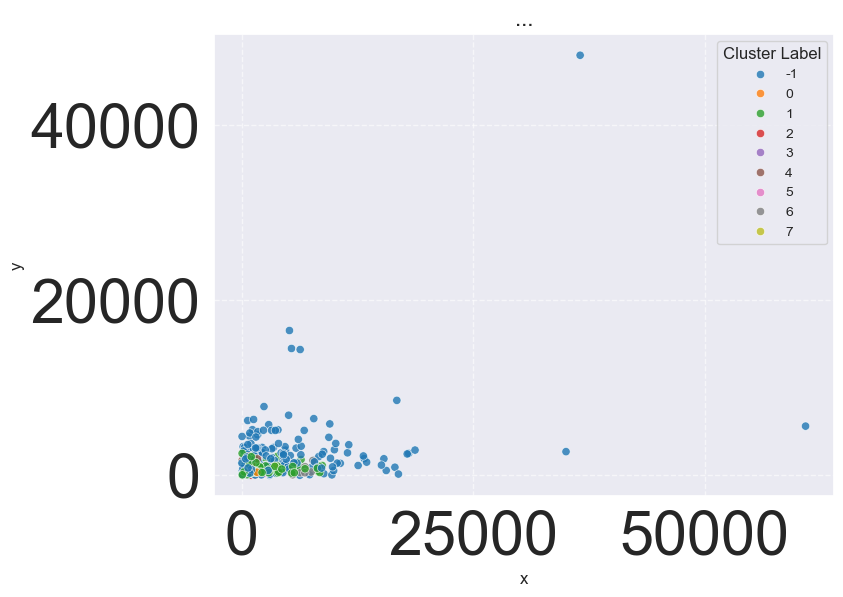

In [282]:
plot(clean_customers["Frozen"],clean_customers["Delicassen"],clean_customers["DBSCAN_Label"])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [290]:
clean_customers.groupby("Label").mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisbon,Oporto,Other,Horeca,Retail,DBSCAN_Label
Label,,,,,,,,,,,,
0,9099.727273,10948.902098,16349.755245,1896.538462,7220.342657,2076.440559,0.125874,0.132867,0.741259,0.006993,0.993007,-0.580420
1,13396.868687,3315.367003,3907.565657,3637.861953,792.417508,1259.299663,0.198653,0.094276,0.707071,1.000000,0.000000,0.646465


In [292]:
clean_customers.groupby("DBSCAN_Label").mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisbon,Oporto,Other,Horeca,Retail,Label
DBSCAN_Label,,,,,,,,,,,,
-1,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,0.192157,0.164706,0.643137,0.509804,0.490196,0.505882
0,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
1,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
2,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
3,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
4,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
5,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
6,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
7,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000


Which algorithm appears to perform better?

**Your observations here**

we can observe how each of the algorithm devided the data for example kmean divided the data into two group and we can se group 0 are customers who prefer packed  products and grop 1 prefer fresh and frozen products

the dbscan algorithm we can observe that the distincions are more elavorated this is for a more detailed analysis

i would say that kmean provides clear data for a global view but i dont know which one performed better

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [184]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [187]:
# Your code here

**Your comment here**

- 